In [1]:
import collections
import csv
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import Utility.notebookutil as nbu
import sys
sys.meta_path.append(nbu.NotebookFinder())

In [3]:
import Kdtree as kdtree
import Clustering as clustering
import Utility.Utility as utility
import Reconstruction as reconstruction

In [4]:
initial_xy_data = utility.load_spectra("CommonData/xyz_m.csv", offset=0)
spectra_data = utility.load_spectra("CommonData/spectrum_m.csv", offset=1)
xy_data = clustering.initialize_xy_data(initial_xy_data)

In [7]:
current_tree = [
    [0.333444973048471, 1, 0],
    [0.389059234962091, 0, 0],
    [0.288243127874986, 0, 0],
    [0.247072787814766, 1, 3],
    [0.428556829741043, 0, 1],
    [0.464102042665547, 0, 2],
#    [0.368343583792887, 1, 5]
    ]

In [18]:
for num, i in enumerate(current_tree):
    xy_data = clustering.prepare_cluster_table(xy_data, i, num + 1)

c:\users\masafumi\anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


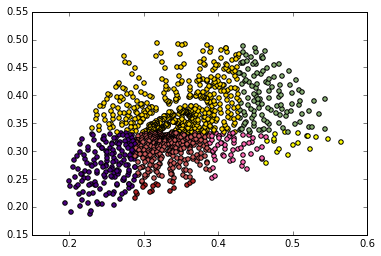

Counter({1: 548, 4: 355, 0: 159, 5: 118, 2: 54, 6: 18, 3: 17})
next cluster index 7


In [9]:
# visualize the clustering
color = matplotlib.colors.cnames.values()
cluster_counter = collections.Counter()
for i in xy_data:
    cluster_counter[int(i[3])] += 1
    plt.scatter(i[1], i[2], c=color[int(i[3])])
plt.show()
print cluster_counter

next_cluster_index = int(max(xy_data[:, 3])) + 1 
print "next cluster index", next_cluster_index

In [10]:
wfile = open("EvaluateClustering" + str(next_cluster_index+1) + ".csv", "wb")
writer = csv.writer(wfile)
writer.writerow(["number of clusters",
                 "average error",
                 "max error",
                 "min error",
                 "median error",
                 "split value",
                 "split dimension", 
                 "split target cluster"])
wfile.close()

In [11]:
for split_dim in [0,1]:#0->split xaxis, 1->split yaxis 
    for target_cluster in range(next_cluster_index): #split target cluster
        print split_dim, target_cluster, time.ctime()
        for split_index in range(xy_data.shape[0]): #index of slice key data
            new_tree_key = clustering.split_and_clustering(xy_data, spectra_data, target_cluster, 
                                            split_index, split_dim, next_cluster_index, current_tree)
            if(new_tree_key != False):
                pc_list, mean_list = reconstruction.load_pc_mean_multi("PCAresult/componentsPCAcluss", 
                                                                        "PCAresult/meanPCAcluss", 
                                                                        next_cluster_index + 1)    
                new_tree = kdtree.make_tree(new_tree_key)
                test_spectra = utility.load_spectra("CommonData/spectrum_m.csv")
                test_reconstruct_spectra = reconstruction.reconstruct(pc_list, mean_list, "CommonData/spectrum_m.csv", 
                                                                      cluster_counter, next_cluster_index, new_tree_key, new_tree)
                    
#                test_reconstruct_spectra = reconstruction.reconstruct_spectra(pc_list, mean_list, test_spectra, next_cluster_index, new_tree)
                if(utility.output_flag):
                    utility.write_result_with_header(test_reconstruct_spectra, "reconstructSpectrum.csv", 
                                                  range(test_reconstruct_spectra.shape[0]))
                error_list = reconstruction.calc_err(test_reconstruct_spectra, test_spectra)
                reconstruction.write_score(next_cluster_index+1, error_list, new_tree_key, 
                                           "EvaluateClustering" + str(next_cluster_index+1) + ".csv")
print "fin", time.ctime()

0 0 Thu Oct 11 23:43:30 2018
0 1 Thu Oct 11 23:46:03 2018
0 2 Thu Oct 11 23:56:44 2018
0 3 Thu Oct 11 23:57:27 2018
0 4 Thu Oct 11 23:57:29 2018
0 5 Fri Oct 12 00:04:09 2018
0 6 Fri Oct 12 00:06:15 2018
1 0 Fri Oct 12 00:06:16 2018
1 1 Fri Oct 12 00:09:06 2018
1 2 Fri Oct 12 00:19:22 2018
1 3 Fri Oct 12 00:20:07 2018
1 4 Fri Oct 12 00:20:08 2018
1 5 Fri Oct 12 00:26:48 2018
1 6 Fri Oct 12 00:28:46 2018
fin Fri Oct 12 00:28:48 2018


In [11]:
new_tree_data_str = utility.show_minimum_error(next_cluter_index + 1)
current_tree = utility.reshape_new_tree_data(new_tree_data_str)
print("new tree")
print(current_tree)

EvaluateClustering8.csv
['8', '0.00040993733626100442', '0.027429195299581134', '3.1018162965403261e-06', '0.00014812943617589428', '[0.333444973048471, 1, 0]', '[0.389059234962091, 0, 0]', '[0.288243127874986, 0, 0]', '[0.247072787814766, 1, 3]', '[0.428556829741043, 0, 1]', '[0.464102042665547, 0, 2]', '[0.3683435837928879, 1, 5]']
('average error :', 0.0004099373362610044)
('new tree :', ['[0.333444973048471, 1, 0]', '[0.389059234962091, 0, 0]', '[0.288243127874986, 0, 0]', '[0.247072787814766, 1, 3]', '[0.428556829741043, 0, 1]', '[0.464102042665547, 0, 2]', '[0.3683435837928879, 1, 5]'])
new tree
[[0.333444973048471, 1, 0], [0.389059234962091, 0, 0], [0.288243127874986, 0, 0], [0.247072787814766, 1, 3], [0.428556829741043, 0, 1], [0.464102042665547, 0, 2], [0.3683435837928879, 1, 5]]
